In [83]:
import os
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import Sequence
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator

from sklearn.model_selection import train_test_split

In [60]:
base_dir = "./data"

one = glob.glob(base_dir + '/*')[0]
glob.glob(one + '/*.jpg')[0].split("/")[-1]
two = os.listdir(base_dir)[0]
glob.glob(os.path.join(base_dir, two) + "/*.jpg")[0]

'./data/n02097658-silky_terrier/n02097658_26.jpg'

In [61]:
# **
# * Extract the file's paths and label.
# *
# * @param {string} directory   The directory where the labeled images are located
# * 
# * @return {DataFrame} pandas dataframe
# *
def extract_path_and_label(directory: str):
  filepaths = []
  labels = []

  label_list = os.listdir(directory)

  for label in label_list:
    labeled_dir_name = os.path.join(directory, label)
    for image in glob.glob(labeled_dir_name + "/*.jpg"):
      labels.append(label)
      filepaths.append(image)

  return pd.DataFrame({ 'filepath': filepaths, 'label': labels })

In [62]:
main_data = extract_path_and_label(base_dir)
main_data['label'].value_counts()

n02085936-Maltese_dog               252
n02088094-Afghan_hound              239
n02092002-Scottish_deerhound        232
n02112018-Pomeranian                219
n02107683-Bernese_mountain_dog      218
                                   ... 
n02102177-Welsh_springer_spaniel    150
n02105162-malinois                  150
n02106166-Border_collie             150
n02086079-Pekinese                  149
n02090379-redbone                   148
Name: label, Length: 120, dtype: int64

In [63]:
main_data.head()

,filepath,label
0,./data/n02097658-silky_terrier/n02097658_26.jpg,n02097658-silky_terrier
1,./data/n02097658-silky_terrier/n02097658_4869.jpg,n02097658-silky_terrier
2,./data/n02097658-silky_terrier/n02097658_595.jpg,n02097658-silky_terrier
3,./data/n02097658-silky_terrier/n02097658_9222.jpg,n02097658-silky_terrier
4,./data/n02097658-silky_terrier/n02097658_422.jpg,n02097658-silky_terrier


In [64]:
main_data.tail()

,filepath,label
20575,./data/n02089078-black-and-tan_coonhound/n0208...,n02089078-black-and-tan_coonhound
20576,./data/n02089078-black-and-tan_coonhound/n0208...,n02089078-black-and-tan_coonhound
20577,./data/n02089078-black-and-tan_coonhound/n0208...,n02089078-black-and-tan_coonhound
20578,./data/n02089078-black-and-tan_coonhound/n0208...,n02089078-black-and-tan_coonhound
20579,./data/n02089078-black-and-tan_coonhound/n0208...,n02089078-black-and-tan_coonhound


In [65]:
train_data, valid_data = train_test_split(main_data, test_size=0.2, stratify=main_data['label'])

In [66]:
train_data['label'].value_counts() / len(train_data)

n02085936-Maltese_dog               0.012269
n02088094-Afghan_hound              0.011601
n02092002-Scottish_deerhound        0.011237
n02112018-Pomeranian                0.010629
n02107683-Bernese_mountain_dog      0.010569
                                      ...   
n02102177-Welsh_springer_spaniel    0.007289
n02106382-Bouvier_des_Flandres      0.007289
n02101556-clumber                   0.007289
n02086079-Pekinese                  0.007228
n02090379-redbone                   0.007167
Name: label, Length: 120, dtype: float64

In [67]:
valid_data['label'].value_counts() / len(valid_data)

n02085936-Maltese_dog                    0.012148
n02088094-Afghan_hound                   0.011662
n02092002-Scottish_deerhound             0.011419
n02111889-Samoyed                        0.010690
n02090721-Irish_wolfhound                0.010690
                                           ...   
n02113624-toy_poodle                     0.007289
n02090622-borzoi                         0.007289
n02100236-German_short-haired_pointer    0.007289
n02102177-Welsh_springer_spaniel         0.007289
n02107908-Appenzeller                    0.007289
Name: label, Length: 120, dtype: float64

In [68]:
main_data['label'].value_counts() / len(main_data)

n02085936-Maltese_dog               0.012245
n02088094-Afghan_hound              0.011613
n02092002-Scottish_deerhound        0.011273
n02112018-Pomeranian                0.010641
n02107683-Bernese_mountain_dog      0.010593
                                      ...   
n02102177-Welsh_springer_spaniel    0.007289
n02105162-malinois                  0.007289
n02106166-Border_collie             0.007289
n02086079-Pekinese                  0.007240
n02090379-redbone                   0.007191
Name: label, Length: 120, dtype: float64

In [75]:
train_map = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True
)
valid_map = ImageDataGenerator(rescale=1./255)

In [76]:
batch_size = 32

train_data_generator = train_map.flow_from_dataframe(
  train_data,
  x_col='filepath',
  y_col='label',
  target_size=(224, 224),
  batch_size=batch_size,
  class_mode='categorical'
)
valid_data_generator = valid_map.flow_from_dataframe(
  valid_data,
  x_col='filepath',
  y_col='label',
  target_size=(224, 224),
  batch_size=batch_size,
  class_mode='categorical'
)

Found 16464 validated image filenames belonging to 120 classes.
Found 4116 validated image filenames belonging to 120 classes.


(32, 224, 224, 3)


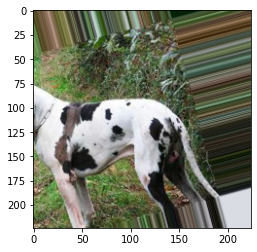

(32, 224, 224, 3)


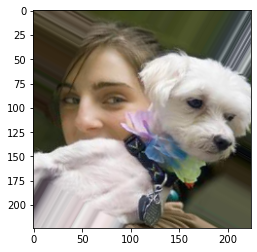

(32, 224, 224, 3)


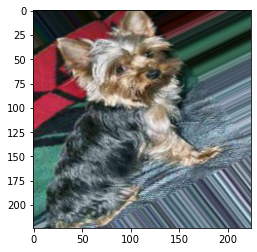

(32, 224, 224, 3)


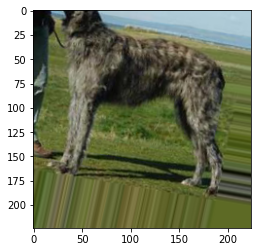

(32, 224, 224, 3)


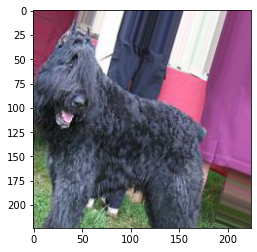

In [77]:
for _ in range(5):
    img, label = train_data_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

In [87]:
input = Input((224, 224, 3))
x = Conv2D(16, (3,3), activation='relu', padding='same')(input)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)

x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)

x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)

x = Conv2D(1024, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)

x = Flatten()(x)

x = Dense(1024, activation='relu')(x)

output = Dense(120, activation='softmax')(x)

model = Model(inputs=input, outputs=output)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 28, 28, 64)        0   

In [85]:
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
              metrics=['accuracy'],)

In [86]:
history = model.fit(train_data_generator,
                    validation_data=valid_data_generator,
                    epochs=20,
                    validation_steps=len(valid_data)//batch_size,
                    steps_per_epoch=len(train_data)//batch_size,
                    callbacks=[
                      ModelCheckpoint(
                        filepath="./models/vanilla_convnet.h5",
                        monitor="val_loss",
                        save_best_only=True
                      ),
                      EarlyStopping(patience=5)
                    ])

2021-11-08 18:40:35.318688: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-08 18:40:35.320207: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2021-11-08 18:40:35.545995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


126/514 [======>.......................] - ETA: 1:12 - loss: 4.7865 - accuracy: 0.0102

KeyboardInterrupt: 